In [25]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.pyplot import savefig
from matplotlib.ticker import FormatStrFormatter
%matplotlib inline

import seaborn as sns
sns.set_style("ticks")
sns.set_context(context='paper',font_scale=1.2)
sns.despine()

import yaml
import os
from sklearn.model_selection import ParameterGrid
import warnings
warnings.filterwarnings('ignore')

<Figure size 432x288 with 0 Axes>

In [26]:
model_path = '/local-scratch/nigam/projects/jlemmon/cl-clmbr/experiments/main/artifacts/models'
results_path = '/local-scratch/nigam/projects/jlemmon/cl-clmbr/experiments/main/artifacts/results'
figure_path = '/local-scratch/nigam/projects/jlemmon/cl-clmbr/experiments/main/notebooks/figures'

In [27]:
# Get baseline model
bl_df = pd.read_csv(f'{results_path}/clmbr/pretrained/gru_sz_800_do_0.1_cd_0_dd_0_lr_0.001_l2_0.01/uni_align_eval.csv')
bl_df['model'] = 'BL'


In [28]:
bl_df.query('split == "test"')

,Unnamed: 0,metric,lower_ci,med_ci,upper_ci,split,CLMBR,model
2,2,alignment,0.134467,0.387717,0.704440,test,BL,BL
3,3,uniformity,-0.294651,-0.154549,-0.063624,test,BL,BL


In [29]:
# Get best CL model by validation score for each task

rd_df = pd.DataFrame()
rd_df = pd.read_csv(f'{results_path}/clmbr/contrastive_learn/gru_sz_800_do_0.1_cd_0_dd_0_lr_0.001_l2_0.01/bs_3000_lr_0.001_temp_0.01_pool_rand_day/uni_align_eval.csv')
rd_df['model'] = f'rand_day'

In [30]:
ed_df.query('split=="test"')

,Unnamed: 0,metric,lower_ci,med_ci,upper_ci,split,CLMBR,model
2,2,alignment,0.310755,0.850753,1.546952,test,CL,rand_day
3,3,uniformity,-0.285601,-0.154549,-0.055559,test,CL,rand_day


In [31]:
# Get best CL model by validation score for each task

mr_df = pd.DataFrame()
mr_df = pd.read_csv(f'{results_path}/clmbr/contrastive_learn/gru_sz_800_do_0.1_cd_0_dd_0_lr_0.001_l2_0.01/bs_3000_lr_0.001_temp_0.01_pool_mean_rep/uni_align_eval.csv')
mr_df['model'] = f'mean_rep'

   Unnamed: 0      metric  lower_ci    med_ci  upper_ci split CLMBR model
2           2   alignment  0.253250  0.387717  0.316723  test    BL    BL
3           3  uniformity  0.140102 -0.154549  0.090925  test    BL    BL
   Unnamed: 0      metric  lower_ci    med_ci  upper_ci split CLMBR     model
2           2   alignment  0.450738  0.711073  0.537125  test    RD  rand_day
3           3  uniformity  0.122079 -0.154513  0.098954  test    RD  rand_day
   Unnamed: 0      metric  lower_ci    med_ci  upper_ci split CLMBR     model
2           2   alignment  0.441698  0.701506  0.561558  test    MR  mean_rep
3           3  uniformity  0.131047 -0.154513  0.098954  test    MR  mean_rep


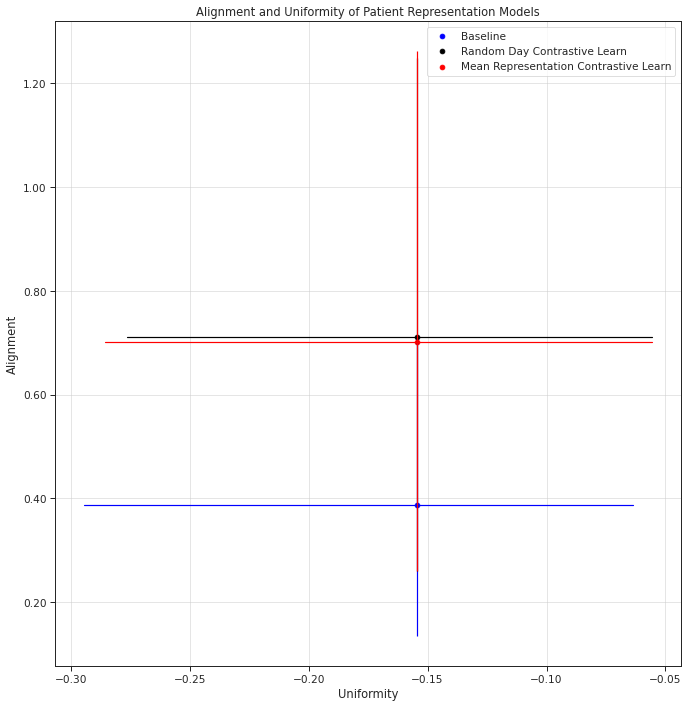

In [32]:
# For each task plot baseline vs CL
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,12))
plt.tight_layout(w_pad=1,h_pad=2,rect=[0.05,0.15,1,0.95])


bl_evals = bl_df.query('split=="test"')
rd_evals = rd_df.query('split=="test"')
mr_evals = mr_df.query('split=="test"')

bl_evals['upper_ci'] = (bl_evals['upper_ci'] - bl_evals['med_ci']).abs()
bl_evals['lower_ci'] = (bl_evals['med_ci'] - bl_evals['lower_ci']).abs()

print(bl_evals)

rd_evals['upper_ci'] = (rd_evals['upper_ci'] - rd_evals['med_ci']).abs()
rd_evals['lower_ci'] = (rd_evals['med_ci'] - rd_evals['lower_ci']).abs()

print(rd_evals)

mr_evals['upper_ci'] = (mr_evals['upper_ci'] - mr_evals['med_ci']).abs()
mr_evals['lower_ci'] = (mr_evals['med_ci'] - mr_evals['lower_ci']).abs()

print(mr_evals)

p1 = axes.scatter(
    bl_evals.query('metric=="uniformity"')['med_ci'],
    bl_evals.query('metric=="alignment"')['med_ci'],
    color = 'black'
)

axes.errorbar(
    bl_evals.query('metric=="uniformity"')['med_ci'],
    bl_evals.query('metric=="alignment"')['med_ci'],
    bl_evals.query('metric=="alignment"')[['lower_ci', 'upper_ci']].values.T,
    color='black'
)

axes.plot(
    [bl_evals.query('metric=="uniformity"')['med_ci'] - bl_evals.query('metric=="uniformity"')['lower_ci'],bl_evals.query('metric=="uniformity"')['med_ci'] + bl_evals.query('metric=="uniformity"')['upper_ci']],
    [bl_evals.query('metric=="alignment"')['med_ci'], bl_evals.query('metric=="alignment"')['med_ci']],
    color='black'
)

p2 = axes.scatter(
    rd_evals.query('metric=="uniformity"')['med_ci'],
    rd_evals.query('metric=="alignment"')['med_ci'],
    color = 'blue'
)

axes.errorbar(
    rd_evals.query('metric=="uniformity"')['med_ci'],
    rd_evals.query('metric=="alignment"')['med_ci'],
    rd_evals.query('metric=="alignment"')[['lower_ci', 'upper_ci']].values.T,
    color='blue'
)

axes.plot(
    [rd_evals.query('metric=="uniformity"')['med_ci'] - rd_evals.query('metric=="uniformity"')['lower_ci'], rd_evals.query('metric=="uniformity"')['med_ci'] + rd_evals.query('metric=="uniformity"')['upper_ci']],
    [rd_evals.query('metric=="alignment"')['med_ci'], rd_evals.query('metric=="alignment"')['med_ci']],
    color='blue'
)

p3 = axes.scatter(
    mr_evals.query('metric=="uniformity"')['med_ci'],
    mr_evals.query('metric=="alignment"')['med_ci'],
    color = 'red'
)

axes.errorbar(
    mr_evals.query('metric=="uniformity"')['med_ci'],
    mr_evals.query('metric=="alignment"')['med_ci'],
    mr_evals.query('metric=="alignment"')[['lower_ci', 'upper_ci']].values.T,
    color='red'
)

axes.plot(
    [mr_evals.query('metric=="uniformity"')['med_ci'] - mr_evals.query('metric=="uniformity"')['lower_ci'], mr_evals.query('metric=="uniformity"')['med_ci'] + mr_evals.query('metric=="uniformity"')['upper_ci']],
    [mr_evals.query('metric=="alignment"')['med_ci'], mr_evals.query('metric=="alignment"')['med_ci']],
    color='red'
)

# axes.yaxis.set_major_locator(MaxNLocator(nbins=4,prune='both'))
axes.grid(which='major', linewidth=0.5, axis='y')
axes.grid(which='major', linewidth=0.5, axis='x')

axes.set_title('Alignment and Uniformity of Patient Representation Models')


axes.set_xlabel('Uniformity')
# axes.spines['bottom'].set_color('white')
# axes.tick_params(axis='x', length=0)  
axes.set_ylabel('Alignment')
axes.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
axes.legend([p1,p2,p3],['Baseline','Random Day Contrastive Learn', 'Mean Representation Contrastive Learn'])


# axes.spines['left'].set_color('white')
# axes.tick_params(axis='y', length=0)
# sns.despine(offset=10, trim=True,)


plt.savefig('figures/uni_align_eval.png', bbox_inches='tight')
plt.show()
